In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#read in csv and create df
movie_df = pd.read_csv('resources/cleaned_movie.csv')
movie_df.head()

,Unnamed: 0,title,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,poster_path,percent_return,profit,genre_1,genre_2,year,month,day
0,0,Black Panther: Wakanda Forever,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,3952.862,Marvel Studios,2022-11-09,250000000.0,855099029.0,162.0,7.403,3586.0,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.420396,605099029.0,Action,Adventure,2022,11,09 00:00:00
1,1,Puss in Boots: The Last Wish,en,Puss in Boots discovers that his passion for a...,3351.139,Other,2022-12-07,90000000.0,442000000.0,103.0,8.461,4047.0,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,4.911111,352000000.0,Animation,Adventure,2022,12,07 00:00:00
2,2,Plane,en,After a heroic job of successfully landing his...,3337.265,Other,2023-01-12,25000000.0,46000000.0,107.0,6.851,652.0,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,1.840000,21000000.0,Action,Adventure,2023,1,12 00:00:00
3,4,M3GAN,en,A brilliant toy company roboticist uses artifi...,1836.162,Other,2022-12-28,12000000.0,167643991.0,102.0,7.510,1794.0,/d9nBoowhjiiYc4FBNtQkPY7c11H.jpg,13.970333,155643991.0,Science Fiction,Horror,2022,12,28 00:00:00
4,5,Knock at the Cabin,en,While vacationing at a remote cabin a young gi...,1677.354,Other,2023-02-01,20000000.0,52000000.0,100.0,6.525,546.0,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,2.600000,32000000.0,Horror,Mystery,2023,2,01 00:00:00


In [3]:
#show all columns of df
movie_df.columns

Index(['Unnamed: 0', 'title', 'original_language', 'overview', 'popularity',
       'production_companies', 'release_date', 'budget', 'revenue', 'runtime',
       'vote_average', 'vote_count', 'poster_path', 'percent_return', 'profit',
       'genre_1', 'genre_2', 'year', 'month', 'day'],
      dtype='object')

## Feature Engineering

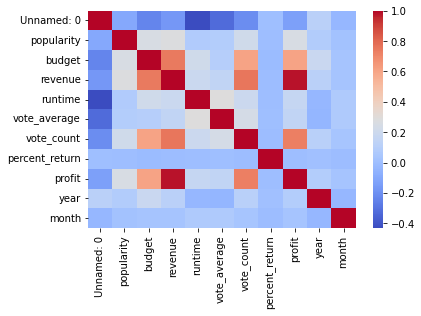

In [4]:
# Create a correlation matrix
corr_matrix = movie_df.corr()

# Display the matrix
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

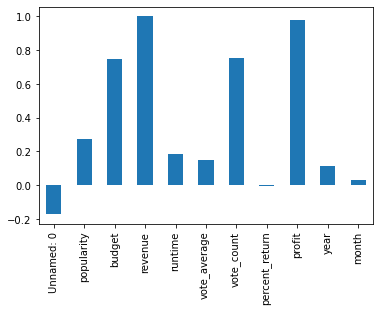

In [5]:
# Display a plot of Target correlations
corr_matrix['revenue'].plot(kind='bar')
plt.show()

In [6]:
#create new days of the week column
import datetime
day_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

#function to determine days of the week
def get_day(x):
    try:
        year, month, day = (int(i) for i in x.split('-'))    
        answer = datetime.date(year, month, day).weekday()
        return day_order[answer]
    except:
        return np.nan

#create new column w/ days of the week   
movie_df['day'] = movie_df['release_date'].apply(get_day)

#show new df with added column
movie_df.head()

,Unnamed: 0,title,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,vote_average,vote_count,poster_path,percent_return,profit,genre_1,genre_2,year,month,day
0,0,Black Panther: Wakanda Forever,en,Queen Ramonda Shuri M’Baku Okoye and the Dora ...,3952.862,Marvel Studios,2022-11-09,250000000.0,855099029.0,162.0,7.403,3586.0,/sv1xJUazXeYqALzczSZ3O6nkH75.jpg,3.420396,605099029.0,Action,Adventure,2022,11,Wed
1,1,Puss in Boots: The Last Wish,en,Puss in Boots discovers that his passion for a...,3351.139,Other,2022-12-07,90000000.0,442000000.0,103.0,8.461,4047.0,/kuf6dutpsT0vSVehic3EZIqkOBt.jpg,4.911111,352000000.0,Animation,Adventure,2022,12,Wed
2,2,Plane,en,After a heroic job of successfully landing his...,3337.265,Other,2023-01-12,25000000.0,46000000.0,107.0,6.851,652.0,/qi9r5xBgcc9KTxlOLjssEbDgO0J.jpg,1.840000,21000000.0,Action,Adventure,2023,1,Thu
3,4,M3GAN,en,A brilliant toy company roboticist uses artifi...,1836.162,Other,2022-12-28,12000000.0,167643991.0,102.0,7.510,1794.0,/d9nBoowhjiiYc4FBNtQkPY7c11H.jpg,13.970333,155643991.0,Science Fiction,Horror,2022,12,Wed
4,5,Knock at the Cabin,en,While vacationing at a remote cabin a young gi...,1677.354,Other,2023-02-01,20000000.0,52000000.0,100.0,6.525,546.0,/dm06L9pxDOL9jNSK4Cb6y139rrG.jpg,2.600000,32000000.0,Horror,Mystery,2023,2,Wed


In [7]:
#drop columns that were determined insignificant
movie_df = movie_df.drop(columns=['Unnamed: 0','overview','poster_path','genre_1','genre_2','profit','release_date','production_companies'])

In [8]:
#create fucntion for feature engineering
def feature_engineering(new_df):
    
    #change language column to is/is not english
    new_df['is_english'] = new_df['original_language'].apply(lambda x: 1 if x=='en' else 0)
    new_df = new_df.drop('original_language', axis=1)
    
    #change days column to is/is not friday
    new_df['is_Friday'] = new_df['day'].apply(lambda x: 1 if x=='Fri' else 0)
    new_df = new_df.drop('day', axis=1)
    
    #change months column to is/is not holiday
    new_df['is_Holiday'] = new_df['month'].apply(lambda x: 1 if x in ['Apr', 'May', 'Jun', 'Nov'] else 0)
    new_df = new_df.drop('month', axis=1)
    
    #drop title
    new_df = new_df.drop(['title'], axis=1)
    
    #create dummy data
    new_df = pd.get_dummies(new_df, prefix='is')
    
    #fill na values 
    new_df['runtime'] = new_df['runtime'].fillna(new_df['runtime'].mean())
    new_df['vote_average'] = new_df['vote_average'].fillna(new_df['vote_average'].mean())

    return new_df

In [9]:
#create new df with feature engineering
new_movie_df = feature_engineering(movie_df)
new_movie_df

,popularity,budget,revenue,runtime,vote_average,vote_count,percent_return,year,is_english,is_Friday,is_Holiday
0,3952.862,250000000.0,855099029.0,162.0,7.403,3586.0,3.420396,2022,1,0,0
1,3351.139,90000000.0,442000000.0,103.0,8.461,4047.0,4.911111,2022,1,0,0
2,3337.265,25000000.0,46000000.0,107.0,6.851,652.0,1.840000,2023,1,0,0
3,1836.162,12000000.0,167643991.0,102.0,7.510,1794.0,13.970333,2022,1,0,0
4,1677.354,20000000.0,52000000.0,100.0,6.525,546.0,2.600000,2023,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9463,0.600,500.0,500.0,10.0,0.000,0.0,1.000000,2018,1,0,0
9464,0.600,500.0,500.0,13.0,8.000,1.0,1.000000,2021,1,1,0
9465,0.600,1600000.0,636990.0,41.0,0.000,0.0,0.398119,2012,0,0,0
9466,0.600,500.0,700.0,4.0,0.000,0.0,1.400000,2020,0,0,0


In [10]:
#show columns of engineered df
new_movie_df.columns

Index(['popularity', 'budget', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'percent_return', 'year', 'is_english', 'is_Friday',
       'is_Holiday'],
      dtype='object')

In [11]:
#save machine learning df to csv 
new_movie_df.to_csv('machine_learning_df.csv')

In [12]:
# Define the X (features) and y (target) sets
y = new_movie_df["revenue"].values
X = new_movie_df.drop("revenue", axis=1)

In [13]:
# Split the data into X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Linear Regression Model

In [14]:
#import dependencies
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
import statistics 

In [15]:
# Creating the linear regression model
classifier = LinearRegression()
classifier

# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# fit model using training data
classifier.fit(X_train_scaled, y_train)
training_score = classifier.score(X_train_scaled, y_train)
testing_score = classifier.score(X_test_scaled, y_test)

#y prediction value
pred_train_linear= classifier.predict(X_train_scaled)
pred_test_linear= classifier.predict(X_test_scaled)

In [16]:
#create function to find Mean Absolute Percentage Error
def custom_mae(test,pred):
    for each in range(len(test)):
        percent = []
        percent.append(abs((pred[each] - test[each])/test[each]))
        
    return percent

In [17]:
# print training and test scores
print(f"Training Score: {training_score}")
print(f'Training Mean Absolute Error:{(mean_absolute_percentage_error(y_train,pred_train_linear))}')
print(f'Training Mean Absolute Percentage Error: {(custom_mae(y_train, pred_train_linear))}')

print(f"Testing Score: {testing_score}")
print(f'Testing Mean Absolute Error:{(mean_absolute_percentage_error(y_test,pred_test_linear))}') 
print(f'Testing Mean Absolute Percentage Error: {(custom_mae(y_test, pred_test_linear))}')

Training Score: 0.7149130456986493
Training Mean Absolute Error:129773.0468950319
Training Mean Absolute Percentage Error: [0.06310080947078724]
Testing Score: 0.6955101712950749
Testing Mean Absolute Error:132147.71899534625
Testing Mean Absolute Percentage Error: [6.989216388033648]


## Lasso Regression for Feature Selection

In [18]:
# import dependencies
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn import linear_model
import numpy as np
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [19]:
# Define the X (features) and y (target) sets
y = new_movie_df["revenue"].values
X = new_movie_df.drop("revenue", axis=1)

# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

#scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# create model
model_lasso = Lasso(alpha=0.01)

# fit model
model_lasso.fit(X_train_scaled, y_train)

# get the values of the coefficients of Lasso regression
coefficients = model_lasso.coef_

# the importance of a feature is the absolute value of its coefficient
importance = np.abs(coefficients)
importance

array([ 7859329.96777299, 70754201.86735797,  3569883.40326166,
        1959887.93736944, 80230530.8455918 ,   590537.85124628,
        7289116.1317098 , 10450120.37114386,   275606.40711522,
              0.        ])

In [20]:
#define features
features = X_train.columns

#show features that are important
np.array(features)[importance > 0]

array(['popularity', 'budget', 'runtime', 'vote_average', 'vote_count',
       'percent_return', 'year', 'is_english', 'is_Friday'], dtype=object)

In [21]:
#there is 1 feature with 0 importance. That feature have been discarded by the Lasso model
np.array(features)[importance == 0]

array(['is_Holiday'], dtype=object)

In [22]:
#show all columns 
new_movie_df.columns

Index(['popularity', 'budget', 'revenue', 'runtime', 'vote_average',
       'vote_count', 'percent_return', 'year', 'is_english', 'is_Friday',
       'is_Holiday'],
      dtype='object')

In [23]:
#drop 'is_Holiday column' to fit lasso regression recommedation
new_movie_df = new_movie_df.drop(columns=['is_Holiday'])

In [24]:
# print training and test scores
pred_train_lasso= model_lasso.predict(X_train_scaled)
print(f'Training Mean Absolute Error:{(mean_absolute_error(y_train,pred_train_lasso))}')
print(f'Training Mean Absolute Percentage Error: {(custom_mae(y_train, pred_train_lasso))}')
print(f'Training Score:{r2_score(y_train, pred_train_lasso)}')

pred_test_lasso= model_lasso.predict(X_test_scaled)
print(f'Testing Mean Absolute Error:{(mean_absolute_error(y_test,pred_test_lasso))}') 
print(f'Testing Mean Absolute Percentage Error: {(custom_mae(y_test, pred_test_lasso))}')
print(f'Testing Score:{r2_score(y_test, pred_test_lasso)}')

Training Mean Absolute Error:40200277.49138605
Training Mean Absolute Percentage Error: [0.06310080956727966]
Training Score:0.7149130456986493
Testing Mean Absolute Error:39792515.51958166
Testing Mean Absolute Percentage Error: [6.989216387913938]
Testing Score:0.695510171314409


## Random Forest Model

In [25]:
# import dependencies
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [26]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
#create RandomForestRegressor model
clf = RandomForestRegressor(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)

#y prediction value
pred_ran_for = clf.predict(X_train_scaled)
test_ran_for = clf.predict(X_test_scaled)

# print training and test scores
print(f'Training Mean Absolute Error: {(mean_absolute_error(y_train,pred_ran_for))}')
print(f'Training Mean Absolute Percentage Error: {(custom_mae(y_train, pred_ran_for))}')
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')

print(f'Testing Mean Absolute Error: {(mean_absolute_error(y_test,test_ran_for))}')
print(f'Testing Mean Absolute Percentage Error: {(custom_mae(y_test, test_ran_for))}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Mean Absolute Error: 1948054.667227151
Training Mean Absolute Percentage Error: [0.019837929335255893]
Training Score: 0.9942137790076767
Testing Mean Absolute Error: 4835413.886421631
Testing Mean Absolute Percentage Error: [0.043028219354838707]
Testing Score: 0.9547865447838357


## Optimize Model 

In [28]:
#locate outliers to decrease Mean Absolute Error
#Import Dependencies
import pandas as pd

In [29]:
# Count the number of samples for each class
class_counts = new_movie_df["revenue"].value_counts()
print(class_counts)

100.0          60
1.0            52
1000000.0      42
2000000.0      39
100000.0       36
               ..
26820641.0      1
29200000.0      1
45640143.0      1
273552592.0     1
700.0           1
Name: revenue, Length: 7829, dtype: int64


In [30]:
#show class samples in df
pd.DataFrame(class_counts).sort_index().head(50)

,revenue
1.0,52
2.0,10
3.0,9
4.0,3
5.0,7
6.0,3
7.0,4
8.0,1
10.0,19
11.0,1


In [31]:
#create new df to include only budgets over 1000000 to decrease outliers 
budget_movie_df = new_movie_df[new_movie_df['budget'] > 1000000]
budget_movie_df

,popularity,budget,revenue,runtime,vote_average,vote_count,percent_return,year,is_english,is_Friday
0,3952.862,250000000.0,855099029.0,162.0,7.403,3586.0,3.420396,2022,1,0
1,3351.139,90000000.0,442000000.0,103.0,8.461,4047.0,4.911111,2022,1,0
2,3337.265,25000000.0,46000000.0,107.0,6.851,652.0,1.840000,2023,1,0
3,1836.162,12000000.0,167643991.0,102.0,7.510,1794.0,13.970333,2022,1,0
4,1677.354,20000000.0,52000000.0,100.0,6.525,546.0,2.600000,2023,1,0
...,...,...,...,...,...,...,...,...,...,...
9392,0.600,2500000.0,2651302.0,104.0,6.000,7.0,1.060521,2015,0,0
9417,0.600,1600000.0,636990.0,41.0,0.000,0.0,0.398119,2012,0,0
9441,0.600,1700000.0,930000.0,139.0,7.000,1.0,0.547059,2015,0,1
9452,0.600,2500000.0,67921.0,80.0,0.000,0.0,0.027168,2005,0,0


In [32]:
#create new df to include only revenues over 1000000 to decrease outliers 
revenue_movie_df = budget_movie_df[budget_movie_df['revenue'] > 1000000]
revenue_movie_df

,popularity,budget,revenue,runtime,vote_average,vote_count,percent_return,year,is_english,is_Friday
0,3952.862,250000000.0,855099029.0,162.0,7.403,3586.0,3.420396,2022,1,0
1,3351.139,90000000.0,442000000.0,103.0,8.461,4047.0,4.911111,2022,1,0
2,3337.265,25000000.0,46000000.0,107.0,6.851,652.0,1.840000,2023,1,0
3,1836.162,12000000.0,167643991.0,102.0,7.510,1794.0,13.970333,2022,1,0
4,1677.354,20000000.0,52000000.0,100.0,6.525,546.0,2.600000,2023,1,0
...,...,...,...,...,...,...,...,...,...,...
9156,0.600,5084000.0,10449798.0,128.0,10.000,1.0,2.055428,2017,0,0
9192,0.600,2221000.0,5773000.0,95.0,0.000,0.0,2.599280,1914,1,0
9220,0.600,1311229.0,1311229.0,2.0,10.000,1.0,1.000000,2018,1,0
9349,0.600,9500000.0,6800000.0,150.0,3.400,36.0,0.715789,2013,0,1


In [33]:
#save machine learning df to csv 
revenue_movie_df.to_csv('revenue_movie_df.csv')

In [34]:
#rerun Random Forest Regression with optimized dataset

# Define the X (features) and y (target) sets
y = revenue_movie_df["revenue"].values
X = revenue_movie_df.drop("revenue", axis=1)

# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# scale the data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
#create RandomForestRegressor model
clf = RandomForestRegressor(random_state=1, n_estimators=100).fit(X_train_scaled, y_train)

#y prediction value
pred_ran_for = clf.predict(X_train_scaled)
test_ran_for = clf.predict(X_test_scaled)

# print training and test scores
print(f'Training Mean Absolute Error: {(mean_absolute_error(y_train,pred_ran_for))}')
print(f'Training Mean Absolute Percentage Error: {(custom_mae(y_train, pred_ran_for))}')
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')

print(f'Testing Mean Absolute Error: {(mean_absolute_error(y_test,test_ran_for))}')
print(f'Testing Mean Absolute Percentage Error: {(custom_mae(y_test, test_ran_for))}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Mean Absolute Error: 2453050.351879915
Training Mean Absolute Percentage Error: [0.08004494105571842]
Training Score: 0.9940297787808136
Testing Mean Absolute Error: 4666163.354649021
Testing Mean Absolute Percentage Error: [0.04506171186445923]
Testing Score: 0.9894347406973355


[1.16123220e-02 4.02321819e-01 1.62523584e-02 3.93589280e-03
 2.79093428e-01 2.81824571e-01 4.24826237e-03 2.50526756e-04
 4.60820539e-04]


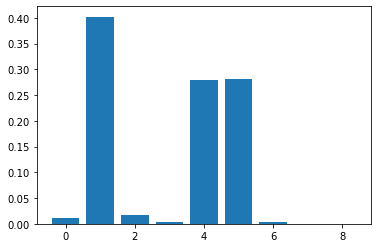

In [36]:
#run feature selection on random forest for greater model optimization
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [37]:
#select important features from model
# 1,4,5 are features: budget, vote_count, percent_return
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

array([False,  True, False, False,  True,  True, False, False, False])

In [38]:
#rerun Random Forest Regression with selectedc features

# Split the data into X_train, X_test, y_train, y_test
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)

# scale the data
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

/Users/BronwynsMac/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [39]:
#create RandomForestRegressor model
clf = RandomForestRegressor(random_state=1, n_estimators=100)
clf.fit(X_selected_train_scaled, y_train)

#y prediction value
pred_select = clf.predict(X_selected_train_scaled )
test_select = clf.predict(X_selected_test_scaled )

# print training and test scores
print(f'Training Mean Absolute Error: {(mean_absolute_error(y_train,pred_select))}')
print(f'Training Mean Absolute Percentage Error: {(custom_mae(y_train, pred_select))}')
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')

print(f'Testing Mean Absolute Error: {(mean_absolute_error(y_test,test_select))}')
print(f'Testing Mean Absolute Percentage Error: {(custom_mae(y_test, test_select))}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

Training Mean Absolute Error: 1997049.5603913297
Training Mean Absolute Percentage Error: [0.07406058049853377]
Training Score: 0.9952112565162652
Testing Mean Absolute Error: 3953817.9541426925
Testing Mean Absolute Percentage Error: [0.029216584534094637]
Testing Score: 0.9901800998666614
